In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

In [11]:
a = open("datos_test_2.txt") # abro el archivo donde está el valor de t en la primera columna y 2
# y el valor de y en la segunda columna

#creacion de posiciones para t e y
t = [] 
y = []
# lectura de los datos de falling
for line in a:
    rline = line.rstrip('\n').split()
    if len(rline) == 2:
        if rline[0] != '//':
            t.append(float(rline[0]))
            y.append(float(rline[1]))
# vuelvo la lista un arreglo para mejor  manipulación
t = np.array(t)
y = np.array(y)

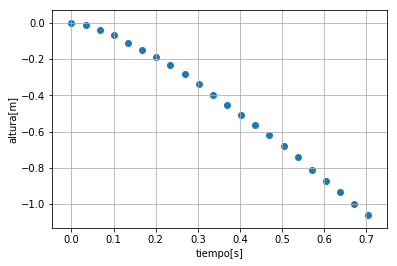

In [15]:
plt.scatter(t,-y)
plt.ylabel('altura[m]')
plt.xlabel('tiempo[s]')
plt.grid('on')
plt.show()


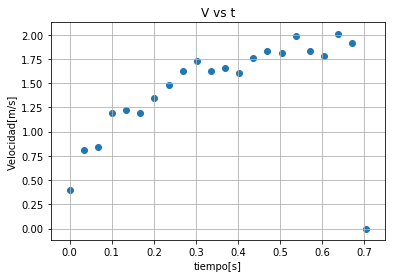

In [34]:
dt = t[1]-t[0] #se determina el intervalo de tiempo del registro de datos
#arreglos en cero de velocidad y aceleración
v = np.zeros(len(t), dtype = float)
a = np.zeros(len(t), dtype = float)
# usando diferencias finitas de segundo orden, se determina la velocidad y la aceleración 
# a partir de la posición
for i in range((len(t)-1)):
    #v[i] =(y[i+1]-y[i-1])/(2*dt)
    v[i] = abs((y[i+1]-y[i])/(dt))
    #a[i] = (v[i+1]-v[i])/(dt)
plt.scatter(t,v)
plt.ylabel('Velocidad[m/s]')
plt.xlabel('tiempo[s]')
plt.grid('on')
plt.title('V vs t')
plt.show()

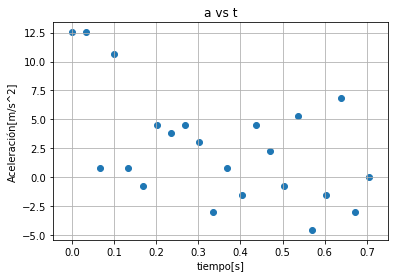

In [35]:
a[0] =  (v[1]-v[0])/(dt)
for j in range (1,len(t)-1):
    a[j] = (y[j+1]+y[j-1]-2*y[j])/(dt**2)
plt.scatter(t,a)
plt.ylabel('Aceleración[m/s^2]')
plt.xlabel('tiempo[s]')
plt.grid('on')
plt.title('a vs t')
plt.show()

Esta gráfica no permite hacer un análisis adecuado de los datos debido a la dispersión de estos. Esto se debe a la mala calidad de los datos tomados en el experimento. Por ende, solo se trabajará con los datos encontrados para la velocidad que presentan menos dispersión. Para proceder, se realiza un ajuste de curva cuadrática